# Polynomial regression - overfitting and underfitting

In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Simulate data
samples = 100
X = np.random.uniform(-3,3, (samples,1))
# Andragradsekvation
f = lambda x: x**2 + .5*x + 3 # Utan noise
# Konstruerar vårt y
y = f(X) + np.random.randn(samples, 1) # adds an epsilon standard normally distributed (noise)


f(X).shape, X.shape

((100, 1), (100, 1))

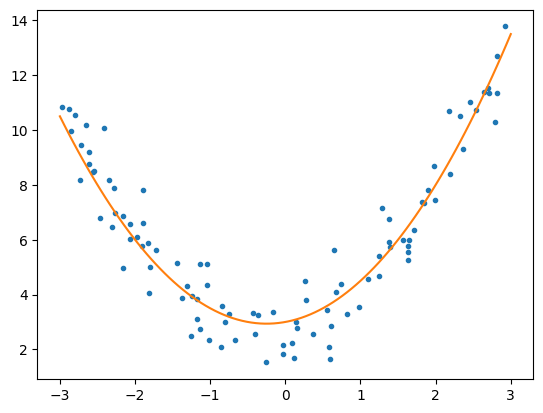

In [33]:
x = np.linspace(-3,3, 100).reshape(100, 1)


plt.plot(X, y, '.')
plt.plot(x, f(x))


<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}, xlabel='x', ylabel='y'>

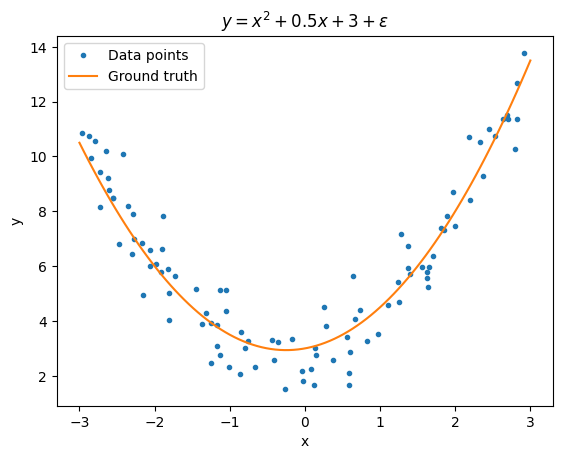

In [34]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X, y, '.', label="Data points")
    x = np.linspace(-3,3, samples).reshape(-1, 1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$", xlabel="x", ylabel= "y")
    ax.legend()

    return ax
    
draw_data()

In [35]:
# # Undersökte reshape...
# x = np.arange(20).reshape(-1, 10)
# x

## Polynomial regression

Polynomial regression fits a polynomial of order $n$ to model the relationship between independent variable $x$ and dependent variable $y$. The polynomial regression model in general:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $$

It is linear in terms of the unknown parameters $\beta_i$, and can be expressed in matrix form and solved using OLS normal equation as we did for multiple linear regression. In fact polynomial regression is a special case of multiple linear regression.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Using ```sklearn.preprocessing.PolynomialFeatures``` we can feature engineer new features that previously didn't exist. It creates a feature matrix that represent polynomial combinations. For example $X = (X_1, X_2)$ would be transformed to ($1, X_1, X_2, X_1^2, X_2^2, X_1X_2, X_2^2)$ using degree 2, if bias is included, if bias is excluded 1 disappears.

## Feature engineering

- constructed features artificially

In [36]:
from sklearn.preprocessing import PolynomialFeatures # Det är en preprocessing för vi behöver artificiellt konstruera features(till en viss grad)

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False) # Går att välja högre degree G
polynomial_features =  polynomial_instance.fit_transform(X)
# Den gör fit och transform tillsammans, Det är okej att göra när man gör polynomial features
# Den tittar på graden så den kommer inte läcka. (Transformerar hela datan, test och train)

polynomial_features[:5], X[:5], .75**2, 2.7**2

# Detta är matrisen från teorin vi har skapat. 

# X, X^2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 0.5625,
 7.290000000000001)

In [37]:
from sklearn.linear_model import LinearRegression
# Todo polynomialregression we use Linearregression

model = LinearRegression()
model.fit(polynomial_features, y) # trains model on dataset
model.coef_
# Vi får ut beta_1 och beta_2


array([[0.43366893, 1.06456263]])

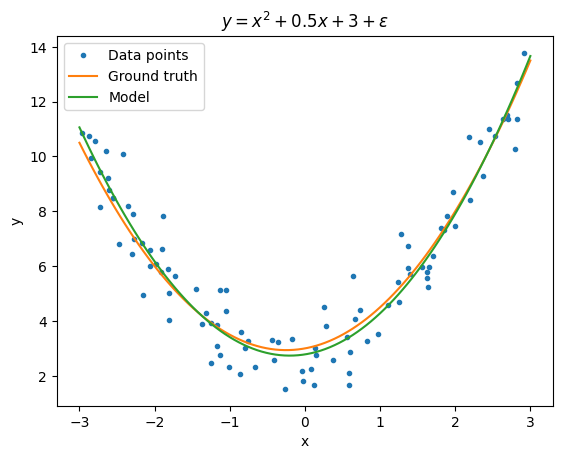

In [38]:
x = np.linspace(-3, 3, samples).reshape(-1,1) # Vi har skapat x-värden från -3 till 3. In this case test data
x_polynomial_features = polynomial_instance.transform(x) # Måste transformera för att göra model.predict


y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()

## Underfitting

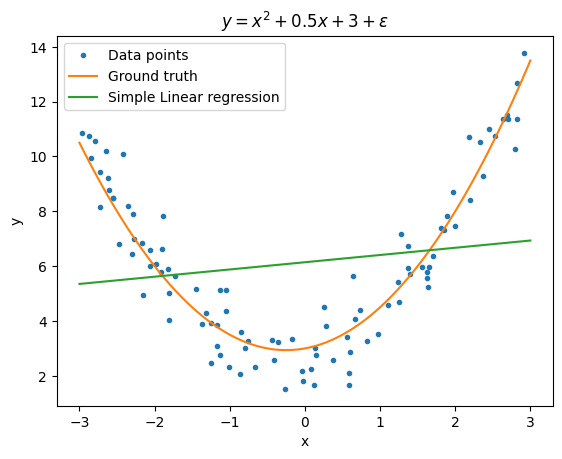

In [39]:
model = LinearRegression()
# Här använde vi original datan för att få en simpel linjär regression
model.fit(X, y)
y_pred = model.predict(x)


ax = draw_data()
ax.plot(x, y_pred, label = "Simple Linear regression")
ax.legend();  


## Overfitting

Model too complicated, and fitted too much to the data. Complicated model (high variance) risk to fit to noise in training data, which make them generalize worse. Overfitting usually occurs when there is too small traning set, and/or it is not representative for testing data.

X_features.shape=(100, 50)


[Text(0.5, 1.0, 'Overfitted, the model is too complex'), (-5.0, 15.0)]

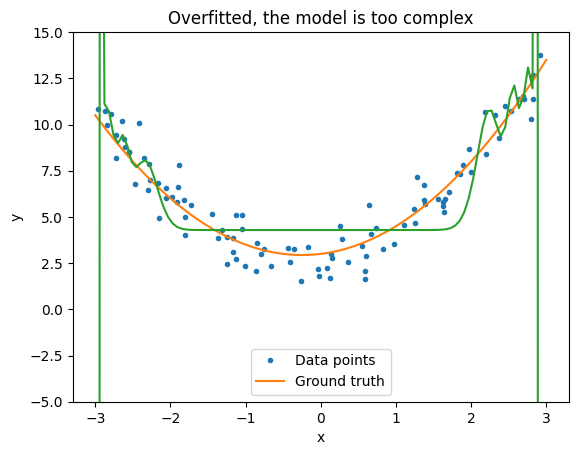

In [40]:
polynomial_instance = PolynomialFeatures(50, include_bias=False)
X_features = polynomial_instance.fit_transform(X)

print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)


x_polynomial_features = polynomial_instance.transform(x)


y_pred = model.predict(x_polynomial_features)


ax = draw_data()
# Runges fenomen, stora svägningar när man har större polynomolgrad när man vill fånga in punkterna
ax.plot(x, y_pred)  
# ax.set(ylim = [-5,15])
ax.set(title = "Overfitted, the model is too complex", ylim = [-5, 15])

## Choose a model

Note that we are not always able to plot the data and its corresponding graphs as our data might be high dimensional. In order to choose correct model we can use a cost/loss function to keep track of the error for different models (different degrees of polynomial).

In [42]:
from sklearn.model_selection import train_test_split

# we increase number of simulated samples 
samples = 10000
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**4 + x**2 + .5*x + 3 # change model to 3rd degree polynomial
y = f(X)+np.random.randn(samples,1)

print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (10000, 1), y.shape: (10000, 1)


### Train|Validation|Test split

We split our data set into

* training set
* validation set
* testing set

Reason for this split is to use the validation data for choosing the degree of the polynomial (a hyperparameter)

In [43]:
# use train_test_split twice to obtain train|val|test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape  
# Test och val behöver inte vara lika stora


((6700, 1), (6700, 1), (1650, 1), (1650, 1), (1650, 1), (1650, 1))

## Elbow

In [49]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1, 100):  # Så förtydling include_bias lägger till 1:or i intercept
    model_poly = PolynomialFeatures(degree, include_bias=False) # bias som false är för att linjär regression har ett intercept från början
    train_features = model_poly.fit_transform(X_train) # Features engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

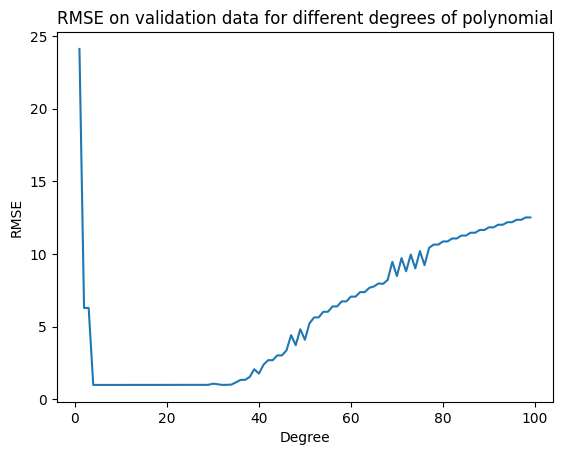

In [51]:
plt.plot(range(1, 100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

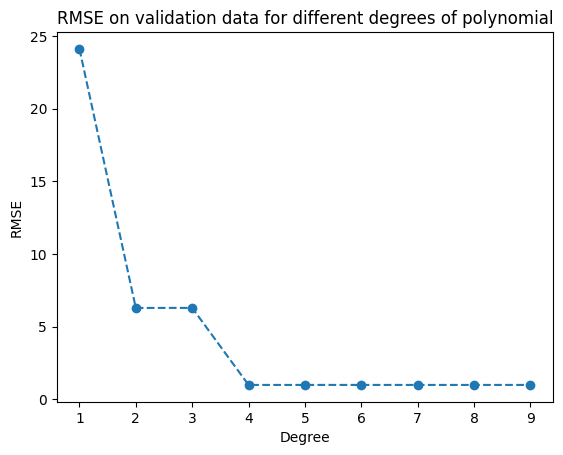

In [59]:
plt.plot(range(1, 10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

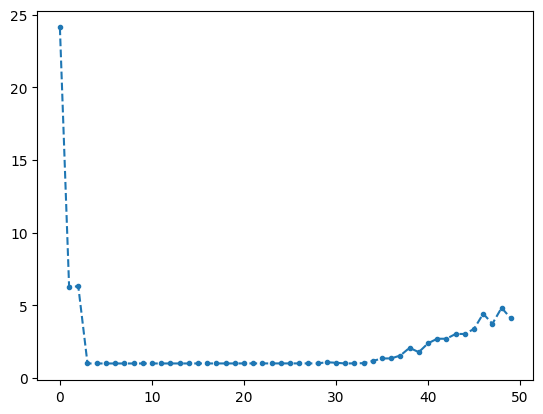

In [60]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases
# note that this might happen much faster for real data
ax.plot(range(50), RMSE_val[:50], '--.', label = "Validation");

### Bias-Variance Trade-off

A models generalization error is bias + variance + irreducible error

* bias - difference between average prediction and correct value.
    * high bias, pay little attention to data,
    * oversimplifies and underfits.
* variance - spread of our data
    * many degrees of freedom -> high variance -> overfit to data
* irreducible error - due to noise of data, only way to decrease this is to clean the data itself.

Higher model complexity -> higher variance, lower bias

Lower model complexity -> lower variance, higher bias

The goal is to choose a model that is complex enough not to underfit, but not too complex to overfit. Need to find a balance between bias and variance.